In [1]:
import os
f = None
choiceColorScale="Viridis"
choiceColorScaleLower=choiceColorScale.lower()

In [2]:
def getInfoByTapePos(x, *p):
    output = "";
    if len(p) == 1:
        output += x[p[0]-1]
    else:
        output += x[p[0]-1:p[1]]
    return output.replace(" ", "_")
def refreshFile():
    global f
    f = open("US1969.dat", "r", encoding="cp1252")

In [3]:
refreshFile()
counter = 0;
resSet = set()
for x in f:
    if (int(getInfoByTapePos(x,58,59)) == 1):
        counter += 1
        current = "{}\t{}\t{}\t{}\t{}".format(
            int(getInfoByTapePos(x,52,53)), # NUMBER OF CHILDREN BORN ALIVE, NOW LIVING 
            int(getInfoByTapePos(x,54,55)), # NUMBER OF CHILDREN BORN ALIVE, NOW DEAD 
            int(getInfoByTapePos(x,56,57)), # NUMBER OF CHILDREN BORN DEAD (FETAL DEATHS)
            int(getInfoByTapePos(x,58,59)), # TOTAL BIRTH ORDER - DETAIL
            int(getInfoByTapePos(x,61,62))  # DETAIL LIVE BIRTH ORDER
        ).replace("55","-").replace("66","X").replace("77"," ").replace("99","?")
        resSet.add(current)
for s in sorted(resSet):
    print(s)
print(counter)
# Conclusion : All records are live births

 	0	 	1	1
 	0	-	1	1
 	0	0	1	1
-	-	 	1	1
-	-	-	1	1
-	-	0	1	1
-	0	 	1	1
-	0	-	1	1
-	0	0	1	1
0	 	 	1	1
0	 	-	1	1
0	 	0	1	1
0	-	 	1	1
0	-	-	1	1
0	-	0	1	1
0	0	 	1	1
0	0	-	1	1
0	0	0	1	1
0	0	X	1	1
0	X	0	1	1
0	X	X	1	1
X	0	0	1	1
X	X	 	1	1
X	X	-	1	1
X	X	X	1	1
645063


In [4]:
residenceDict = {
#     New England
    "11": "Maine",
    "12": "New Hampshire",
    "13": "Vermont",
    "14": "Massachusetts",
    "15": "Rhode Island",
    "16": "Connecticut",
#     Middle Atlantic
    "21": "New York",
    "22": "New Jersey",
    "23": "Pennsylvania",
#     East North Central
    "31": "Ohio",
    "32": "Indiana",
    "33": "Illinois",
    "34": "Michigan",
    "35": "Wisconsin",
#     West North Central
    "41": "Minnesota",
    "42": "Iowa",
    "43": "Missouri",
    "44": "North Dakota",
    "45": "South Dakota",
    "46": "Nebraska",
    "47": "Kansas",
#     South Atlantic
    "51": "Delaware",
    "52": "Maryland",
    "53": "District of Columbia",
    "54": "Virginia",
    "55": "West Virginia",
    "56": "North Carolina",
    "57": "South Carolina",
    "58": "Georgia",
    "59": "Florida",
#     East South Central
    "61": "Kentucky",
    "62": "Tennessee",
    "63": "Alabama",
    "64": "Mississippi",
#     West South Central
    "71": "Arkansas",
    "72": "Louisiana",
    "73": "Oklahoma",
    "74": "Texas",
#     Mountain
    "81": "Montana",
    "82": "Idaho",
    "83": "Wyoming",
    "84": "Colorado",
    "85": "New Mexico",
    "86": "Arizona",
    "87": "Utah",
    "88": "Nevada",
#     Pacific
    "91": "Washington",
    "92": "Oregon",
    "93": "California",
    "94": "Alaska",
    "95": "Hawaii"
}
print("{0} = {1}".format(len(residenceDict),len(set(residenceDict.items()))))


51 = 51


In [5]:
occurenceDict = {
    "01": "Alabama",
    "02": "Alaska",
    "03": "Arizona",
    "04": "Arkansas",
    "05": "California",
    "06": "Colorado",
    "07": "Connecticut",
    "08": "Delaware",
    "09": "District of Columbia",
    "10": "Florida",
    "11": "Georgia",
    "12": "Hawaii",
    "13": "Idaho",
    "14": "Illinois",
    "15": "Indiana",
    "16": "Iowa",
    "17": "Kansas",
    "18": "Kentucky",
    "19": "Louisiana",
    "20": "Maine",
    "21": "Maryland",
    "22": "Massachusetts",
    "23": "Michigan",
    "24": "Minnesota",
    "25": "Mississippi",
    "26": "Missouri",
    "27": "Montana",
    "28": "Nebraska",
    "29": "Nevada",
    "30": "New Hampshire",
    "31": "New Jersey",
    "32": "New Mexico",
    "33": "New York",
    "34": "North Carolina",
    "35": "North Dakota",
    "36": "Ohio",
    "37": "Oklahoma",
    "38": "Oregon",
    "39": "Pennsylvania",
    "40": "Rhode Island",
    "41": "South Carolina",
    "42": "South Dakota",
    "43": "Tennessee",
    "44": "Texas",
    "45": "Utah",
    "46": "Vermont",
    "47": "Virginia",
    "48": "Washington",
    "49": "West Virginia",
    "50": "Wisconsin",
    "51": "Wyoming"
}

In [6]:
for j in {7,8,9}:
    refreshFile()
    counter = 0;
    for x in f:
        if (int(getInfoByTapePos(x,28,29)) == j):
            counter += 1
    print(str(counter) + "\t" + str(j) + "\t" + occurenceDict["0"+str(j)])

5060	8	Delaware
13896	9	District of Columbia
24601	7	Connecticut


https://www.cdc.gov/nchs/data/vsus/nat69_1.pdf
Note that the dataset (variable f) is a 50% sample of births in 1969.
PDF page 54 shows that DC had 27792 births while Delaware had 10120.
This clarifies the alphabetical order.

In [7]:
refreshFile()
birthsFromTexasResidence = 0
birthsInTexas = 0
birthsInTexasByResident = 0
birthsInTexasByNonResident = 0

for x in f:
    if (int(getInfoByTapePos(x,26,27)) == 74):
        birthsFromTexasResidence += 1
    if (int(getInfoByTapePos(x,28,29)) == 44):
        birthsInTexas += 1
    if (int(getInfoByTapePos(x,28,29)) == 44) and (int(getInfoByTapePos(x,26,27)) == 74):
        birthsInTexasByResident += 1
    if (int(getInfoByTapePos(x,28,29)) == 44) and not (int(getInfoByTapePos(x,26,27)) == 74):
        birthsInTexasByNonResident += 1

print(str(birthsFromTexasResidence*2) + "\tbirthsFromTexasResidence") 
print(str(birthsInTexas*2) + "\tbirthsInTexas") 
print(str(birthsInTexasByResident*2) + "\tbirthsInTexasByResident") 
print(str(birthsInTexasByNonResident*2) + "\tbirthsInTexasByNonResident") 

print("Values multiplied by 2 because the data is a 50% sample")

226620	birthsFromTexasResidence
226942	birthsInTexas
225130	birthsInTexasByResident
1812	birthsInTexasByNonResident
Values multiplied by 2 because the data is a 50% sample


In [8]:
birthsInStateOccur = {key: 0 for key in occurenceDict.values()}
birthsInStateRes = {key: 0 for key in residenceDict.values()}
refreshFile()
for x in f:
    birthsInStateOccur[occurenceDict[getInfoByTapePos(x,28,29)]] += 1
    birthsInStateRes[residenceDict[getInfoByTapePos(x,26,27)]] += 1
birthsInStateOccur

{'Alabama': 32056,
 'Alaska': 3412,
 'Arizona': 17050,
 'Arkansas': 16705,
 'California': 176483,
 'Colorado': 20053,
 'Connecticut': 24601,
 'Delaware': 5060,
 'District of Columbia': 13896,
 'Florida': 53463,
 'Georgia': 45833,
 'Hawaii': 7880,
 'Idaho': 6538,
 'Illinois': 96606,
 'Indiana': 47281,
 'Iowa': 23953,
 'Kansas': 17733,
 'Kentucky': 29149,
 'Louisiana': 37553,
 'Maine': 8651,
 'Maryland': 30166,
 'Massachusetts': 47454,
 'Michigan': 82028,
 'Minnesota': 32990,
 'Mississippi': 23569,
 'Missouri': 40656,
 'Montana': 5811,
 'Nebraska': 12403,
 'Nevada': 4454,
 'New Hampshire': 6161,
 'New Jersey': 56908,
 'New Mexico': 10663,
 'New York': 156012,
 'North Carolina': 46980,
 'North Dakota': 5644,
 'Ohio': 94795,
 'Oklahoma': 20879,
 'Oregon': 17244,
 'Pennsylvania': 93382,
 'Rhode Island': 7936,
 'South Carolina': 24603,
 'South Dakota': 5640,
 'Tennessee': 36630,
 'Texas': 113471,
 'Utah': 12407,
 'Vermont': 3889,
 'Virginia': 39187,
 'Washington': 29619,
 'West Virginia': 14

In [9]:
population1969 = {
#     New England
    "Maine": 978,
    "New Hampshire": 717,
    "Vermont": 439,
    "Massachusetts": 5467,
    "Rhode Island": 911,
    "Connecticut": 3000,
#     Middle Atlantic
    "New York": 18321,
    "New Jersey": 7148,
    "Pennsylvania": 11803,
#     East North Central
    "Ohio": 10740,
    "Indiana": 5118,
    "Illinois": 11047,
    "Michigan": 8766,
    "Wisconsin": 4233,
#     West North Central
    "Minnesota": 3700,
    "Iowa": 2781,
    "Missouri": 4651,
    "North Dakota": 615,
    "South Dakota": 659,
    "Nebraska": 1449,
    "Kansas": 2321,
#     South Atlantic
    "Delaware": 540,
    "Maryland": 3765,
    "District of Columbia": 798,
    "Virginia": 4669,
    "West Virginia": 1819,
    "North Carolina": 5205,
    "South Carolina": 2692,
    "Georgia": 4641,
    "Florida": 6354,
#     East South Central
    "Kentucky": 3232,
    "Tennessee": 3985,
    "Alabama": 3531,
    "Mississippi": 2360,
#     West South Central
    "Arkansas": 1995,
    "Louisiana": 3745,
    "Oklahoma": 2568,
    "Texas": 11187,
#     Mountain
    "Montana": 694,
    "Idaho": 718,
    "Wyoming": 320,
    "Colorado": 2100,
    "New Mexico": 994,
    "Arizona": 1693,
    "Utah": 1045,
    "Nevada": 457,
#     Pacific
    "Washington": 3402,
    "Oregon": 2032,
    "California": 19443,
    "Alaska": 282,
    "Hawaii": 794
}
print(sum(population1969.values()))

201924


https://www.cdc.gov/nchs/data/vsus/nat69_1.pdf
PDF page 280.
The total population is listed as 201,921 thousand.
It's clear that the given state figures are rounded. 

In [10]:
stateAbbrMap = {'Alaska': 'AK',
 'Alabama': 'AL',
 'Arkansas': 'AR',
 'Arizona': 'AZ',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'District of Columbia': 'DC',
 'Delaware': 'DE',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Iowa': 'IA',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Massachusetts': 'MA',
 'Maryland': 'MD',
 'Maine': 'ME',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Missouri': 'MO',
 'Mississippi': 'MS',
 'Montana': 'MT',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Nebraska': 'NE',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'Nevada': 'NV',
 'New York': 'NY',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Virginia': 'VA',
 'Vermont': 'VT',
 'Washington': 'WA',
 'Wisconsin': 'WI',
 'West Virginia': 'WV',
 'Wyoming': 'WY'}

In [11]:
import plotly.express as px
import pandas as pd
locations = []
population = []
for i in birthsInStateOccur.keys():
    locations.append(stateAbbrMap.get(i))
    population.append(population1969.get(i))
df = pd.DataFrame(locations, columns=['State'])
df['Population']=population
df['Population'] = df['Population']*1000

fig = px.choropleth(
    df,
    locations="State",
    locationmode="USA-states",
    color="Population",
    scope="usa",
    labels={"population","Population"},
    color_continuous_scale=choiceColorScale
)
fig.update_layout(
    title="Population by State, 1969",
    geo=dict(scope="usa")
)
fig.show()

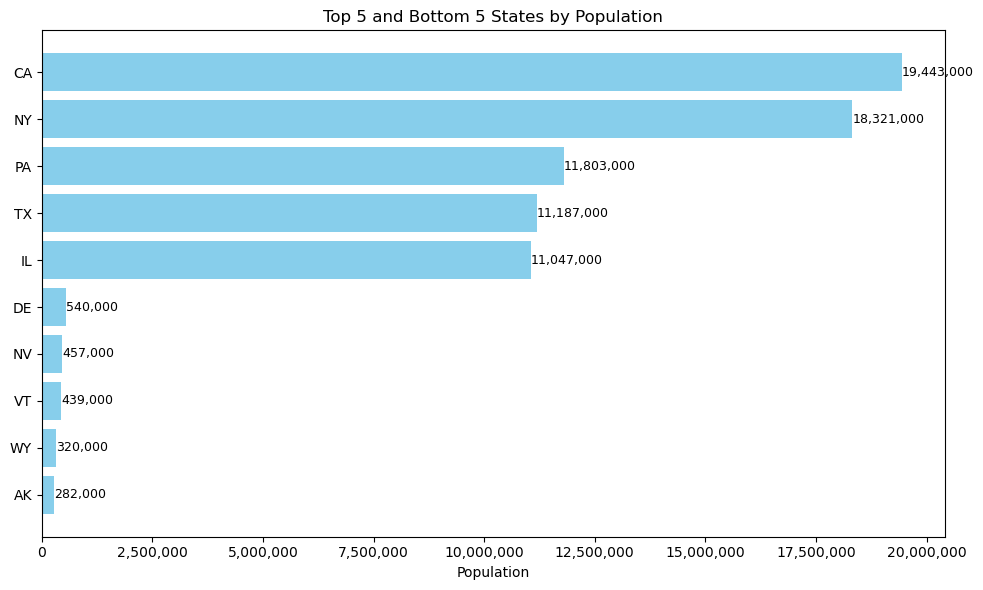

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Sort the DataFrame based on population
sorted_state_populations = df.sort_values(by='Population', ascending=False)

# Get the top 5 and bottom 5 states
top_5_states = sorted_state_populations.head(5)
bottom_5_states = sorted_state_populations.tail(5)

# Create a figure and axes for the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the top 5 states
top_bars = ax.barh(top_5_states['State'], top_5_states['Population'], color='skyblue', label='Top 5 States')

# Plot the bottom 5 states
bottom_bars = ax.barh(bottom_5_states['State'], bottom_5_states['Population'], color='skyblue', label='Bottom 5 States')

# Set the labels and title
ax.set_xlabel('Population')
ax.set_title('Top 5 and Bottom 5 States by Population')

# Invert the y-axis to display states from top to bottom
ax.invert_yaxis()

# Add labels to the bars
for bar in top_bars + bottom_bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width:,}', ha='left', va='center', color='black', fontsize=9)

# Add a legend
# ax.legend()

# Set the x-axis formatter to non-scientific notation
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

# Show the bar chart
plt.tight_layout()
plt.show()

In [13]:
stateAbbrMapRev = {v: k for k, v in stateAbbrMap.items()}
df['StateNonAbbr']=df['State'].map(stateAbbrMapRev)
df['birthsOccurrence']=df['StateNonAbbr'].map(birthsInStateOccur)
df['birthsOccurrence']=df['birthsOccurrence']*2
df['birthsResident']=df['StateNonAbbr'].map(birthsInStateRes)
df['birthsResident']=df['birthsResident']*2
# df['birthsOccurrence']=birthsInStateOccur
# df['birthsResident']=birthsInStateRes
# df['birthsOccurrence']=df['birthsOccurrence']*2
# df['birthsResident']=df['birthsResident']*2
# df_birthsOccurrence=pd.DataFrame(birthsInStateOccur.items())
# df_birthsOccurrence
df.head()

State  Population StateNonAbbr  birthsOccurrence  birthsResident
0    AL     3531000      Alabama             64112           64784
1    AK      282000       Alaska              6824            6874
2    AZ     1693000      Arizona             34100           34282
3    AR     1995000     Arkansas             33410           33898
4    CA    19443000   California            352966          353526

In [14]:
fig = px.choropleth(
    df,
    locations="State",
    locationmode="USA-states",
    color="birthsOccurrence",
    scope="usa",
    labels={"birthsOccurrence"},
    color_continuous_scale=choiceColorScale
)
fig.update_layout(
    title="Live Birth Occurrences by State, 1969",
    geo=dict(scope="usa")
)
fig.show()

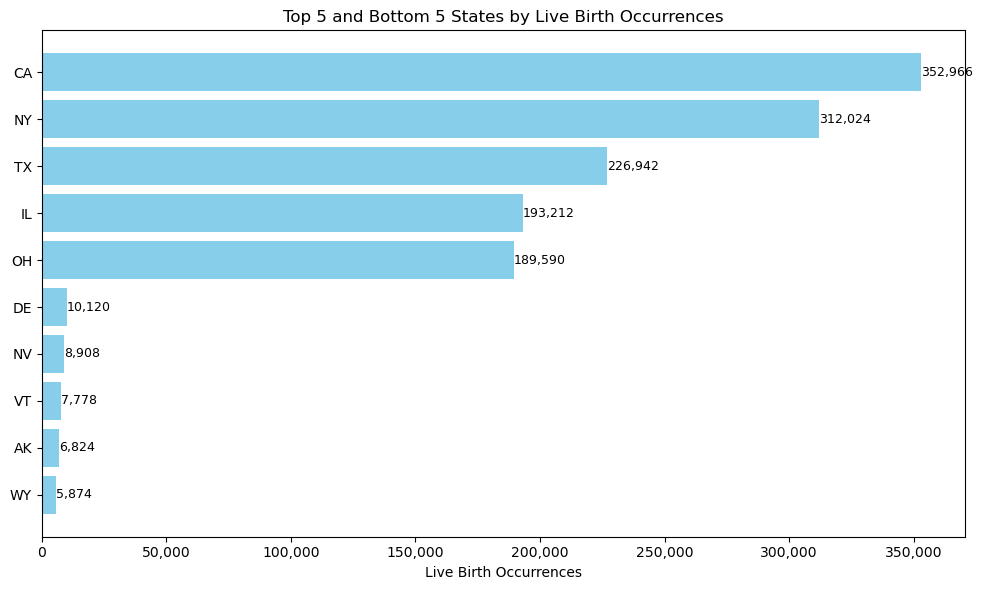

In [15]:
# Sort the DataFrame based on population
sorted_state_populations = df.sort_values(by='birthsOccurrence', ascending=False)

# Get the top 5 and bottom 5 states
top_5_states = sorted_state_populations.head(5)
bottom_5_states = sorted_state_populations.tail(5)

# Create a figure and axes for the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the top 5 states
top_bars = ax.barh(top_5_states['State'], top_5_states['birthsOccurrence'], color='skyblue', label='Top 5 States')

# Plot the bottom 5 states
bottom_bars = ax.barh(bottom_5_states['State'], bottom_5_states['birthsOccurrence'], color='skyblue', label='Bottom 5 States')

# Set the labels and title
ax.set_xlabel('Live Birth Occurrences')
ax.set_title('Top 5 and Bottom 5 States by Live Birth Occurrences')

# Invert the y-axis to display states from top to bottom
ax.invert_yaxis()

# Add labels to the bars
for bar in top_bars + bottom_bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width:,}', ha='left', va='center', color='black', fontsize=9)

# Add a legend
# ax.legend()

# Set the x-axis formatter to non-scientific notation
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

# Show the bar chart
plt.tight_layout()
plt.show()

In [16]:
fig = px.choropleth(
    df,
    locations="State",
    locationmode="USA-states",
    color="birthsResident",
    scope="usa",
    labels={"birthsResident"},
    color_continuous_scale=choiceColorScale
)
fig.update_layout(
    title="Live Birth by State Residence, 1969",
    geo=dict(scope="usa")
)
fig.show()

In [17]:
df['residentBirthRate']=df['birthsResident'] / df['Population'] * 1000
fig = px.choropleth(
    df,
    locations="State",
    locationmode="USA-states",
    color="residentBirthRate",
    scope="usa",
    labels={"residentBirthRate"},
   color_continuous_scale=choiceColorScale
)
fig.update_layout(
    title="Live Births Per 1000 Residents by State, 1969",
    geo=dict(scope="usa")
)
fig.show()

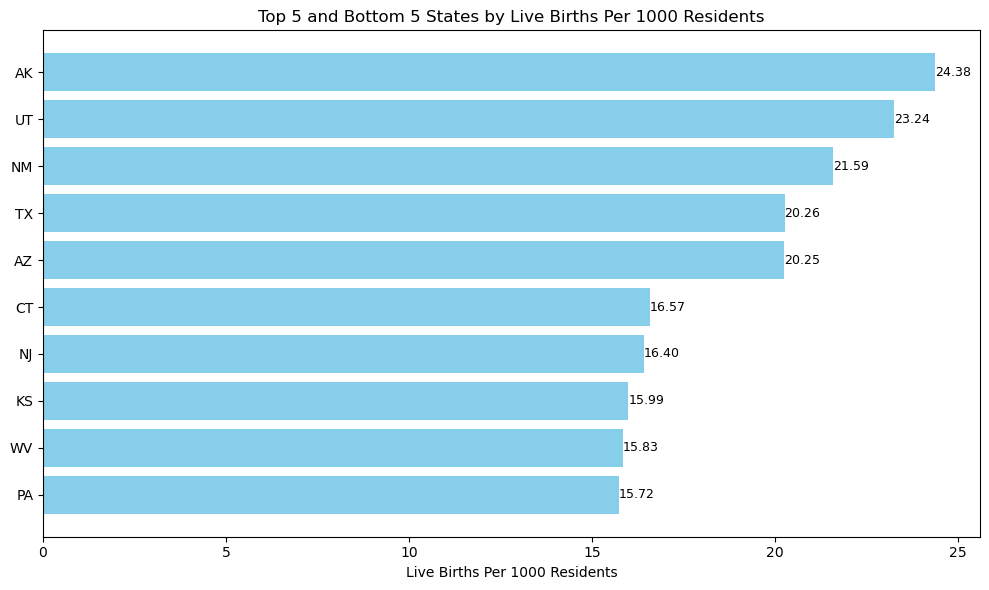

In [18]:
# Sort the DataFrame based on population
sorted_state_populations = df.sort_values(by='residentBirthRate', ascending=False)

# Get the top 5 and bottom 5 states
top_5_states = sorted_state_populations.head(5)
bottom_5_states = sorted_state_populations.tail(5)

# Create a figure and axes for the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the top 5 states
top_bars = ax.barh(top_5_states['State'], top_5_states['residentBirthRate'], color='skyblue', label='Top 5 States')

# Plot the bottom 5 states
bottom_bars = ax.barh(bottom_5_states['State'], bottom_5_states['residentBirthRate'], color='skyblue', label='Bottom 5 States')

# Set the labels and title
ax.set_xlabel('Live Births Per 1000 Residents')
ax.set_title('Top 5 and Bottom 5 States by Live Births Per 1000 Residents')

# Invert the y-axis to display states from top to bottom
ax.invert_yaxis()

# Add labels to the bars
for bar in top_bars + bottom_bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='left', va='center', color='black', fontsize=9)

# Add a legend
# ax.legend()

# Set the x-axis formatter to non-scientific notation
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

# Show the bar chart
plt.tight_layout()
plt.show()

In [19]:
df['occurBirthRate']=df['birthsResident'] / df['Population'] * 1000
fig = px.choropleth(
    df,
    locations="State",
    locationmode="USA-states",
    color="occurBirthRate",
    scope="usa",
    labels={"occurBirthRate"},
   color_continuous_scale=choiceColorScale
)
fig.update_layout(
    title="Occurrence of Live Births Per 1000 Residents by State, 1969",
    geo=dict(scope="usa")
)
fig.show()

In [20]:
refreshFile()
counter = 0;
resSet = dict()
motherEdu = []
motherEduCt = []
reported = 0
notReported = 0
for x in f:
    entry = int(getInfoByTapePos(x,98,99))
    if entry in resSet:
        resSet[entry] = resSet.get(entry)+1
    else:
        resSet[entry] = 1
for s in sorted(resSet):
    if s <= 17:
        reported += resSet[s]*2/1000
        motherEdu.append(s)
        motherEduCt.append(resSet[s]*2/1000)
    else:
        notReported += resSet[s]*2/1000
print("Education Level of Mother")
print("reported\t%5.2f thousand" % (reported))
print("notReported\t%5.2f thousand" % (notReported))
# Conclusion : All records are live births

Education Level of Mother
reported	2221.47 thousand
notReported	1378.74 thousand


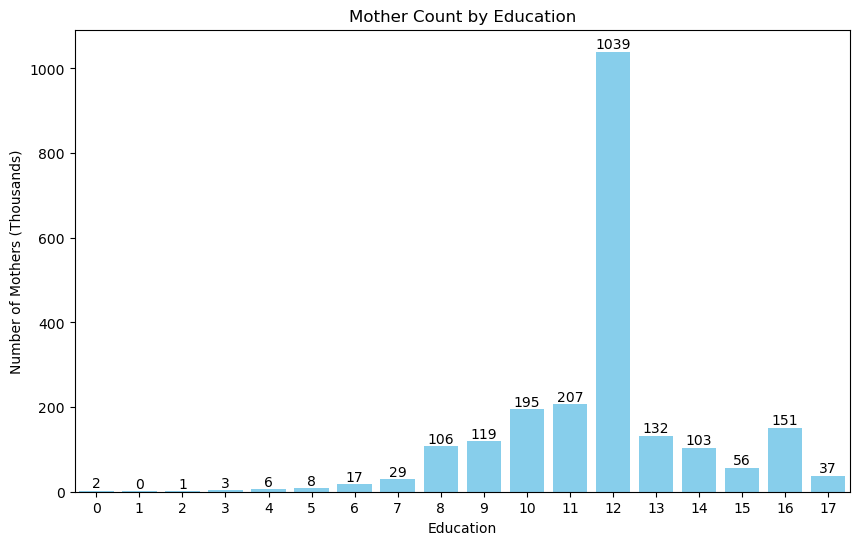

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import MultipleLocator

# Generate a smooth curve using spline interpolation
x_smooth = np.linspace(min(motherEdu), max(motherEdu), 100)
y_smooth = np.interp(x_smooth, motherEdu, motherEduCt)

plt.figure(figsize=(10, 6))

# Plot the data as a bar chart
bars = plt.bar(motherEdu, motherEduCt, color='skyblue', label='Bar Chart')

# Plot the curve
# plt.plot(x_smooth, y_smooth, color='blue', label='Smooth Curve')

# Adding labels, title, and legend
plt.xlabel('Education')
plt.ylabel('Number of Mothers (Thousands)')
plt.title('Mother Count by Education')
# plt.legend()
plt.xlim(-0.5, 17.5)

# Set the x-axis ticks to display whole numbers only
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))

# Add counts above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, str(int(height)), ha='center', va='bottom')


# Display the chart
plt.show()

In [22]:
refreshFile()
counter = 0;
resSet = dict()
birthAges = []
birthAgeCt = []
for x in f:
    entry = int(getInfoByTapePos(x,41,42))
    if entry in resSet:
        resSet[entry] = resSet.get(entry)+1
    else:
        resSet[entry] = 1
for s in sorted(resSet):
    birthAges.append(s)
    birthAgeCt.append(resSet[s]*2/1000)
#     print(str(s) + "\t" + str(resSet[s]))

# Conclusion : All records are live births

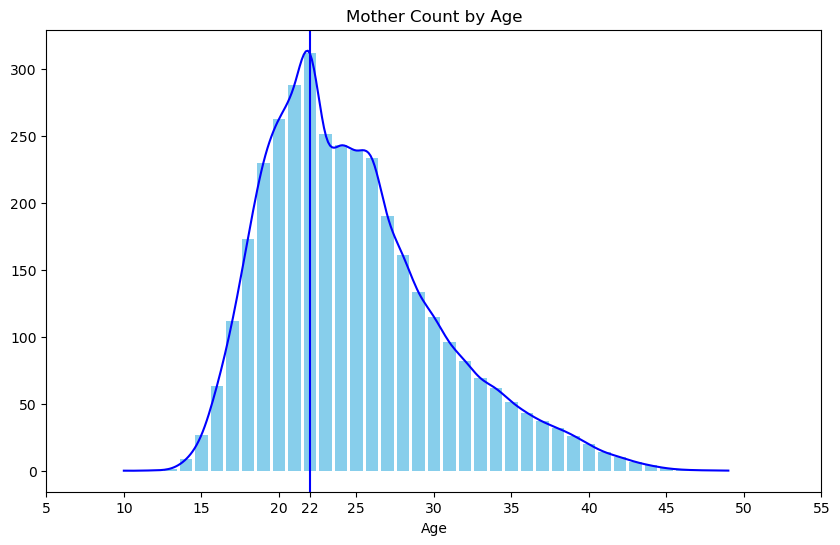

In [23]:
import numpy as np
from scipy.interpolate import make_interp_spline

# Generate a smooth curve using spline interpolation
x_smooth = np.linspace(min(birthAges), max(birthAges), 300)  # Increase the number of points for smoother curve
spl = make_interp_spline(birthAges, birthAgeCt)
y_smooth = spl(x_smooth)

plt.figure(figsize=(10, 6))

# Plot the data as a bar chart
plt.bar(birthAges, birthAgeCt, color='skyblue')

# Plot the curve
plt.plot(x_smooth, y_smooth, color='blue')

# Adding labels, title, and legend
plt.xlabel('Age')
# plt.ylabel('Number of Mothers (Thousands)')
plt.title('Mother Count by Age')
# plt.legend()

plt.xticks(list(plt.xticks()[0]) + [22])
plt.axvline(x=22, color='blue', linestyle='-')


# Display the chart
plt.show()

In [24]:
refreshFile()
counter = 0;
birth_counts = {}
reported = 0
notReported = 0
for x in f:
    education_level = int(getInfoByTapePos(x,98,99))
    birth_order = getInfoByTapePos(x,58,59)
    if (education_level > 17) or (int(birth_order) > 54):
        notReported += 2
        continue
    reported += 2
    if int(birth_order) > 23:
        birth_order = ">23"
    if education_level not in birth_counts:
        birth_counts[education_level] = {}
    if birth_order not in birth_counts[education_level]:
        birth_counts[education_level][birth_order] = 0
        
    birth_counts[education_level][birth_order] = birth_counts[education_level][birth_order] + 2

print("Education Level and Live Birth Order")
print("reported\t%5.2f thousand" % (reported/1000))
print("notReported\t%5.2f thousand" % (notReported/1000))
# Conclusion : All records are live births

Education Level and Live Birth Order
reported	2200.88 thousand
notReported	1399.32 thousand


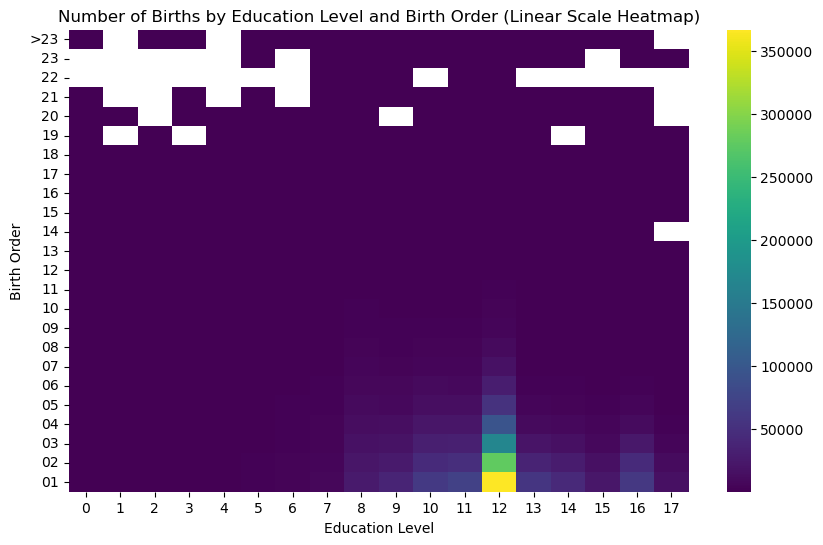

In [25]:
import seaborn as sns
# Create a DataFrame from the birth_counts dictionary
df = pd.DataFrame(birth_counts)

# Reversed order for larger bars at the back
df = df.loc[list(reversed(df.index)), :]

# Define birth orders with ">23" at the end and sort them in reverse
birth_orders = list(df.index)
sorted_birth_orders = sorted(birth_orders, key=lambda x: int(x.split()[0]) if x != ">23" else float('inf'), reverse=True)

# Update the DataFrame index to match the sorted birth orders
df = df.reindex(sorted_birth_orders)

# Sort education_levels in alphabetical order
education_levels = sorted(list(df.columns))

# Update the DataFrame columns to match the sorted education levels
df = df[education_levels]

# Create the heatmap with no numbers displayed
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=False, cmap=choiceColorScaleLower)

# Set the labels and title
plt.xlabel('Education Level')
plt.ylabel('Birth Order')
plt.title('Number of Births by Education Level and Birth Order (Linear Scale Heatmap)')

# Display the chart
plt.show()

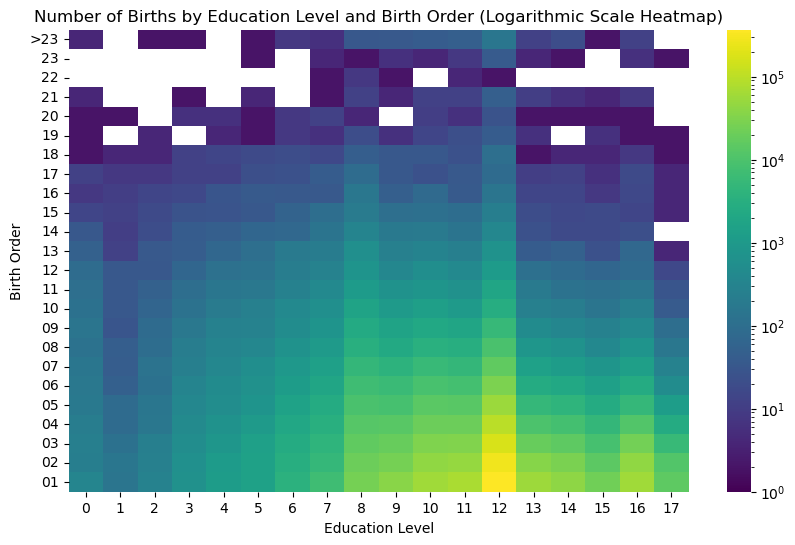

In [26]:
from matplotlib.colors import LogNorm  # Import LogNorm from matplotlib.colors submodule

max_value = max(max(inner_dict.values()) for inner_dict in birth_counts.values())

plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=False, cmap=choiceColorScaleLower, norm=LogNorm(vmin=1, vmax=max_value))

# Set the labels and title
plt.xlabel('Education Level')
plt.ylabel('Birth Order')
plt.title('Number of Births by Education Level and Birth Order (Logarithmic Scale Heatmap)')

# Display the chart
plt.show()

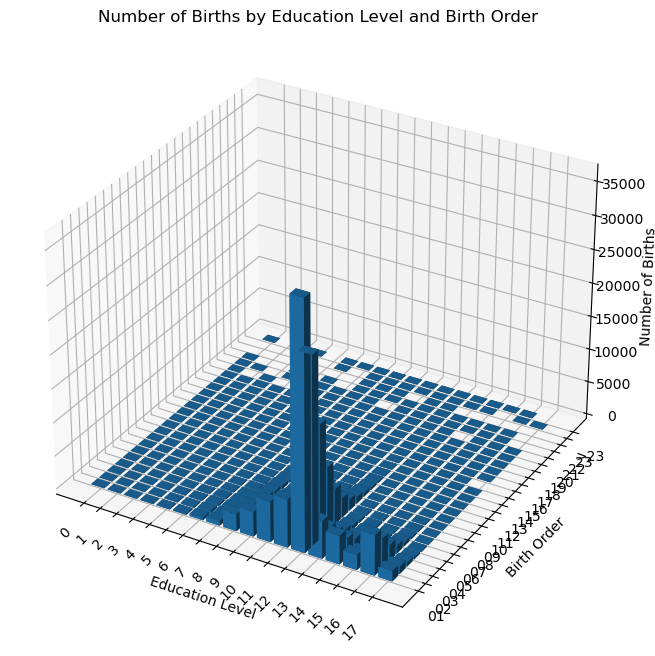

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a DataFrame from the birth_counts dictionary
df = pd.DataFrame(birth_counts)

# Reversed order for larger bars at the back
df = df.loc[list(reversed(df.index)), :]

# Sort education_levels in alphabetical order
education_levels = sorted(list(df.columns))

# Update the DataFrame columns to match the sorted education levels
df = df[education_levels]

# Get the x, y, and z coordinates for the bars
x_data = list(df.columns)

# Define a custom sorting function for the "Birth Order" axis
def custom_sort(value):
    try:
        # Sort numerically based on Birth Order
        return int(value.split()[0])
    except ValueError:
        # For the special case ">23," set a large value for sorting
        return float('inf')

# Sort "Birth Order" numerically and then alphabetically
sorted_birth_orders = sorted(list(df.index), key=custom_sort)

# Create a mapping of original birth order to sorted birth order positions
birth_order_mapping = {order: pos for pos, order in enumerate(sorted_birth_orders)}

# Get the sorted bar heights based on the new order
bar_height = []
for order in sorted_birth_orders:
    bar_height.extend(df.loc[order].values/10)

# Get the positions for sorted "Birth Order"
y_pos = np.array([birth_order_mapping[order] for order in sorted_birth_orders]).repeat(len(x_data))

# Create the 3D figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Sort bars based on Birth Order and height using argsort
sorted_indices = np.argsort(y_pos + bar_height)  # Adding small offset to ensure proper overlap
x_pos = np.array(np.tile(np.arange(len(x_data)), len(sorted_birth_orders)))[sorted_indices]
y_pos = np.array(np.repeat(list(birth_order_mapping.values()), len(x_data)))[sorted_indices]
bar_height = np.array(bar_height)[sorted_indices]

# Plot the 3D bars
ax.bar3d(x_pos, y_pos, np.zeros(len(x_data) * len(sorted_birth_orders)), 0.8, 0.8, bar_height, shade=True)

# Set the labels and title
ax.set_xlabel('Education Level')
ax.set_ylabel('Birth Order')
ax.set_zlabel('Number of Births')
ax.set_title('Number of Births by Education Level and Birth Order')

# Set the tick positions and labels
ax.set_xticks(np.arange(len(x_data)) + 0.4)
ax.set_xticklabels(x_data)
ax.set_yticks(np.arange(len(sorted_birth_orders)) + 0.4)
ax.set_yticklabels(sorted_birth_orders)

# Rotate the x-axis labels for better visibility
ax.set_xticklabels(x_data, rotation=45, ha='right')

# Set the z-axis scaling based on the maximum value from birth_counts
ax.set_zlim(0, max(bar_height))

# Display the chart
plt.show()

In [28]:
df.sort_index().apply(pd.to_numeric, errors='coerce').astype('Int64').fillna(0).astype('Int64')

0    1    2    3     4     5     6     7      8      9      10     11  \
01   340  148  280  606  1122  1546  3626  6920  25474  36794  60304  71604   
02   234  154  250  592  1088  1538  3110  5140  20420  25502  44006  47782   
03   244  122  236  508   842  1372  2500  4166  16282  18420  31068  32062   
04   214   86  164  446   664  1044  2072  3208  12466  13184  20886  20592   
05   178   86  156  382   516   766  1572  2542   9188   8496  13796  13038   
06   166   48  122  330   456   608  1106  1870   6790   5790   8840   8006   
07   154   42  130  240   368   544   906  1394   4744   3776   5602   4760   
08   128   44   92  214   318   384   700  1024   3272   2316   3328   3014   
09   144   30   86  166   266   300   474   744   2348   1672   2188   1854   
10   118   32   62  126   192   248   418   552   1714   1008   1340   1048   
11   102   32   52   96   150   172   268   420   1098    640    792    630   
12    90   32   32   66   114   130   214   290    752    386    542    406   
13    52   12   34   42    70   104   188   204    560    248    310    242   
14    32   10   20   40    46    64    74   138    326    178    188    138   
15    14   12   18   26    28    32    56    96    200    104    106     94   
16     8   10   14   16    30    36    34    34    160     46     78     36   
17    12    8    8   12    12    22    24    40     88     32     24     34   
18     2    4    4   12    14    18    20    16     44     32     32     24   
19     2    0    4    0     4     2     8     6     20      6     14     22   
20     2    2    0    6     6     2     8    12      4      0     10      6   
21     4    0    0    2     0     4     0     2     12      4     12     12   
22     0    0    0    0     0     0     0     2      8      2      0      4   
23     0    0    0    0     0     2     0     4      2      6      4      8   
>23    4    0    2    2     0     2     8     6     32     34     40     46   

         12     13     14     15     16     17  
01   367110  56052  42590  22750  60136  15402  
02   278188  35342  27652  14482  44090  11050  
03   168812  18902  15062   8226  23520   5526  
04    95832   9730   8090   4750  11224   2562  
05    52878   5080   4144   2568   5054   1216  
06    29072   2562   2186   1400   2528    488  
07    16436   1426   1122    780   1336    294  
08     9230    826    646    394    766    158  
09     5394    454    364    262    412     98  
10     2972    252    214    146    242     38  
11     1882    184    128    108    142     30  
12     1076    110     84     66     82     16  
13      662     40     52     24     74      4  
14      382     24     18     18     22      0  
15      224     20     16     18     14      4  
16      144     14     14      8     16      4  
17       82     10     12      6     18      4  
18      102      2      4      4      8      2  
19       40      6      0      6      2      2  
20       26      2      2      2      2      0  
21       46     10      6      4      8      0  
22        2      0      0      0      0      0  
23       38      4      2      0      6      2  
>23     156     12     20      2     12      0

In [29]:
refreshFile()
counter = 0;
birth_counts = {}
reported = 0
notReported = 0
for x in f:
    mother_age = int(getInfoByTapePos(x,41,42))
    birth_order = getInfoByTapePos(x,58,59)
    if (mother_age > 50) or (int(birth_order) > 54):
        notReported += 2
        continue
    reported += 2
    if int(birth_order) > 23:
        birth_order = ">23"
    if mother_age not in birth_counts:
        birth_counts[mother_age] = {}
    if birth_order not in birth_counts[mother_age]:
        birth_counts[mother_age][birth_order] = 0
        
    birth_counts[mother_age][birth_order] = birth_counts[mother_age][birth_order] + 2

print("Mother Age and Live Birth Order")
print("reported\t%5.2f thousand" % (reported/1000))
print("notReported\t%5.2f thousand" % (notReported/1000))
# Conclusion : All records are live births

Mother Age and Live Birth Order
reported	3570.48 thousand
notReported	29.72 thousand


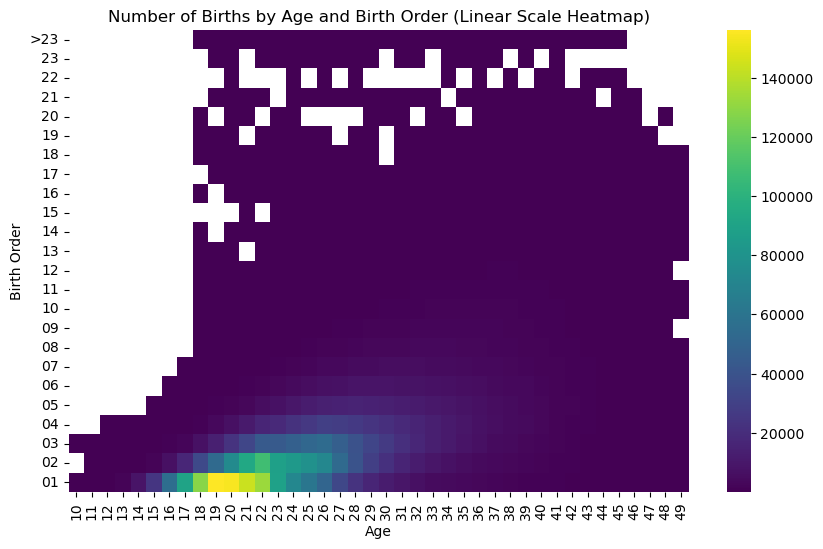

In [30]:
# Create a DataFrame from the birth_counts dictionary
df = pd.DataFrame(birth_counts)

# Reversed order for larger bars at the back
df = df.loc[list(reversed(df.index)), :]

# Define birth orders with ">23" at the end and sort them in reverse
birth_orders = list(df.index)
sorted_birth_orders = sorted(birth_orders, key=lambda x: int(x.split()[0]) if x != ">23" else float('inf'), reverse=True)

# Update the DataFrame index to match the sorted birth orders
df = df.reindex(sorted_birth_orders)

# Sort education_levels in alphabetical order
education_levels = sorted(list(df.columns))

# Update the DataFrame columns to match the sorted education levels
df = df[education_levels]

# Create the heatmap with no numbers displayed
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=False, cmap=choiceColorScaleLower)

# Set the labels and title
plt.xlabel('Age')
plt.ylabel('Birth Order')
plt.title('Number of Births by Age and Birth Order (Linear Scale Heatmap)')

# Display the chart
plt.show()

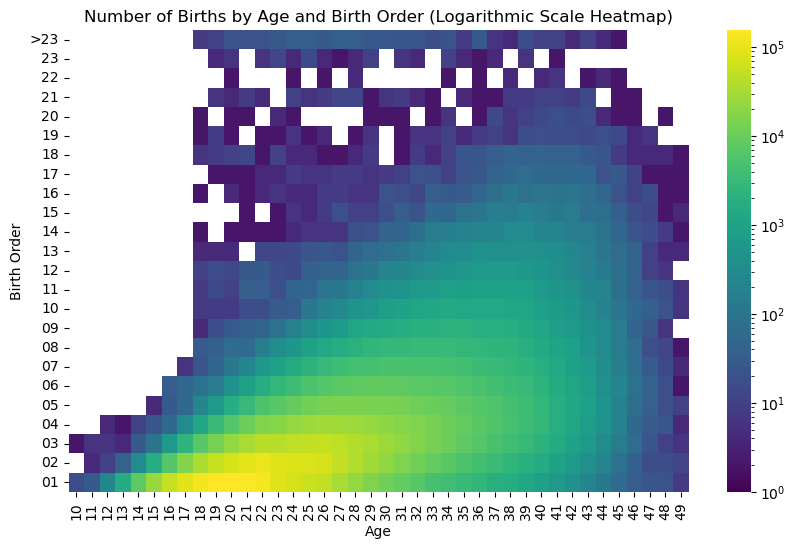

In [31]:
max_value = max(max(inner_dict.values()) for inner_dict in birth_counts.values())

plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=False, cmap=choiceColorScaleLower, norm=LogNorm(vmin=1, vmax=max_value))

# Set the labels and title
plt.xlabel('Age')
plt.ylabel('Birth Order')
plt.title('Number of Births by Age and Birth Order (Logarithmic Scale Heatmap)')

# Display the chart
plt.show()

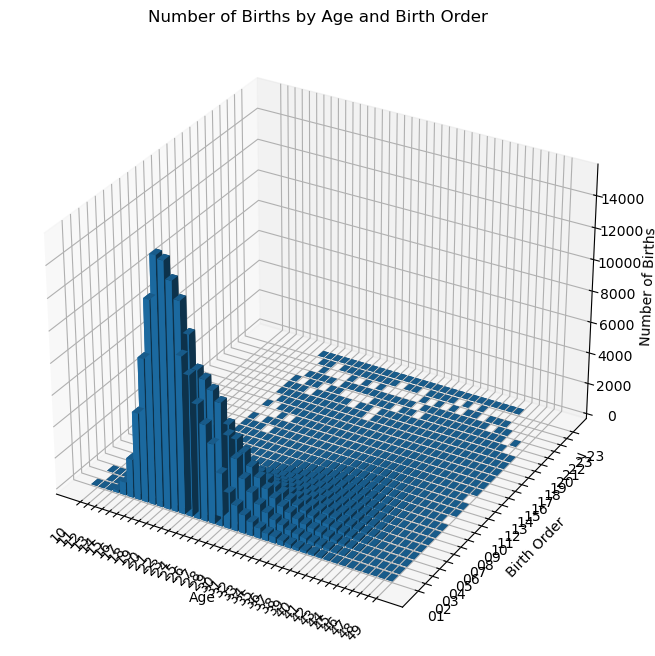

In [32]:
# Create a DataFrame from the birth_counts dictionary
df = pd.DataFrame(birth_counts)

# Reversed order for larger bars at the back
df = df.loc[list(reversed(df.index)), :]

# Sort education_levels in alphabetical order
education_levels = sorted(list(df.columns))

# Update the DataFrame columns to match the sorted education levels
df = df[education_levels]

# Get the x, y, and z coordinates for the bars
x_data = list(df.columns)

# Define a custom sorting function for the "Birth Order" axis
def custom_sort(value):
    try:
        # Sort numerically based on Birth Order
        return int(value.split()[0])
    except ValueError:
        # For the special case ">23," set a large value for sorting
        return float('inf')

# Sort "Birth Order" numerically and then alphabetically
sorted_birth_orders = sorted(list(df.index), key=custom_sort)

# Create a mapping of original birth order to sorted birth order positions
birth_order_mapping = {order: pos for pos, order in enumerate(sorted_birth_orders)}

# Get the sorted bar heights based on the new order
bar_height = []
for order in sorted_birth_orders:
    bar_height.extend(df.loc[order].values/10)

# Get the positions for sorted "Birth Order"
y_pos = np.array([birth_order_mapping[order] for order in sorted_birth_orders]).repeat(len(x_data))

# Create the 3D figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Sort bars based on Birth Order and height using argsort
sorted_indices = np.argsort(y_pos + bar_height)  # Adding small offset to ensure proper overlap
x_pos = np.array(np.tile(np.arange(len(x_data)), len(sorted_birth_orders)))[sorted_indices]
y_pos = np.array(np.repeat(list(birth_order_mapping.values()), len(x_data)))[sorted_indices]
bar_height = np.array(bar_height)[sorted_indices]

# Plot the 3D bars
ax.bar3d(x_pos, y_pos, np.zeros(len(x_data) * len(sorted_birth_orders)), 0.8, 0.8, bar_height, shade=True)

# Set the labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Birth Order')
ax.set_zlabel('Number of Births')
ax.set_title('Number of Births by Age and Birth Order')

# Set the tick positions and labels
ax.set_xticks(np.arange(len(x_data)) + 0.4)
ax.set_xticklabels(x_data)
ax.set_yticks(np.arange(len(sorted_birth_orders)) + 0.4)
ax.set_yticklabels(sorted_birth_orders)

# Rotate the x-axis labels for better visibility
ax.set_xticklabels(x_data, rotation=45, ha='right')

# Set the z-axis scaling based on the maximum value from birth_counts
ax.set_zlim(0, max(bar_height))

# Display the chart
plt.show()

In [33]:
df.sort_index().loc[:, '12':'30'].apply(pd.to_numeric, errors='coerce').astype('Int64').fillna(0).astype('Int64')

12    13    14     15     16     17      18      19      20      21  \
01   264  1540  8048  24354  55236  90676  128246  156190  154394  143636   
02    10    42   312   1738   6274  16868   34478   53342   74152   93846   
03     6     4    28    100    660   2382    6874   13754   22592   32650   
04     4     2    10     22     54    308    1160    3096    6240   10582   
05     0     0     0      4     28     54     256     642    1608    3036   
06     0     0     0      0     32     50      90     148     424     896   
07     0     0     0      0      0      6      22      48     122     238   
08     0     0     0      0      0      0      30      36      64      60   
09     0     0     0      0      0      0       4      16      28      38   
10     0     0     0      0      0      0       8       8       8      16   
11     0     0     0      0      0      0       8      14      10      34   
12     0     0     0      0      0      0      10      16      14      26   
13     0     0     0      0      0      0       4       4       4       0   
14     0     0     0      0      0      0       2       0       2       2   
15     0     0     0      0      0      0       0       0       0       2   
16     0     0     0      0      0      0       2       0       4       2   
17     0     0     0      0      0      0       0       2       2       2   
18     0     0     0      0      0      0       6       8      10      12   
19     0     0     0      0      0      0       2       8       2       0   
20     0     0     0      0      0      0       2       0       2       2   
21     0     0     0      0      0      0       0       6       4       8   
22     0     0     0      0      0      0       0       0       2       0   
23     0     0     0      0      0      0       0       4       6       0   
>23    0     0     0      0      0      0       8      10      20      20   

         22     23     24     25     26     27     28     29     30  
01   132990  89054  72478  61230  50532  33428  22864  16368  11782  
02   108490  88028  83748  78280  72168  53088  40066  28828  21756  
03    43696  43452  47088  51822  54198  46384  39480  32174  26630  
04    15886  18068  22300  25494  29122  28064  26200  23268  20860  
05     5280   6894   9298  11626  13812  14550  14814  14290  13998  
06     1664   2624   3732   5238   6436   7260   8056   8250   8438  
07      564    894   1462   2178   3074   3636   4294   4474   4958  
08      162    336    530    940   1308   1664   2120   2456   2846  
09       46     92    176    316    546    710   1138   1356   1484  
10       16     30     34    118    202    282    476    596    762  
11       32     18     48     52    102    126    186    302    402  
12       28     16     14     38     42     46     88    116    222  
13       12     12     14     22     26     20     48     68     82  
14        2      2      4      6      6      6     18     20     46  
15        0      2      6      4      8     18     10     10     18  
16        4      6      4      4      8      8      6      6     20  
17        4      4      8      6      6      8      8      6      8  
18        2     10      4      4      2      2      4      8      0  
19        2      2      6      2      4      0      2      6      0  
20        0      4      2      0      0      0      0      2      2  
21        4      0     10      6      8     12     12      2      6  
22        0      0      2      0      2      0      4      0      0  
23        6     12      4     14      4      2      4     10      0  
>23      20     26     34     34     28     38     34     26     26

In [34]:
refreshFile()
counter = 0;
birth_counts = {}
reported = 0
notReported = 0
for x in f:
    education_level = int(getInfoByTapePos(x,98,99))
    mother_age = int(getInfoByTapePos(x,41,42))
    if (education_level > 17) or (mother_age > 50):
        notReported += 2
        continue
    reported += 2
    if education_level not in birth_counts:
        birth_counts[education_level] = {}
    if mother_age not in birth_counts[education_level]:
        birth_counts[education_level][mother_age] = 0
        
    birth_counts[education_level][mother_age] = birth_counts[education_level][mother_age] + 2

print("Mother Age and Education Level")
print("reported\t%5.2f thousand" % (reported/1000))
print("notReported\t%5.2f thousand" % (notReported/1000))
# Conclusion : All records are live births

Mother Age and Education Level
reported	2221.47 thousand
notReported	1378.74 thousand


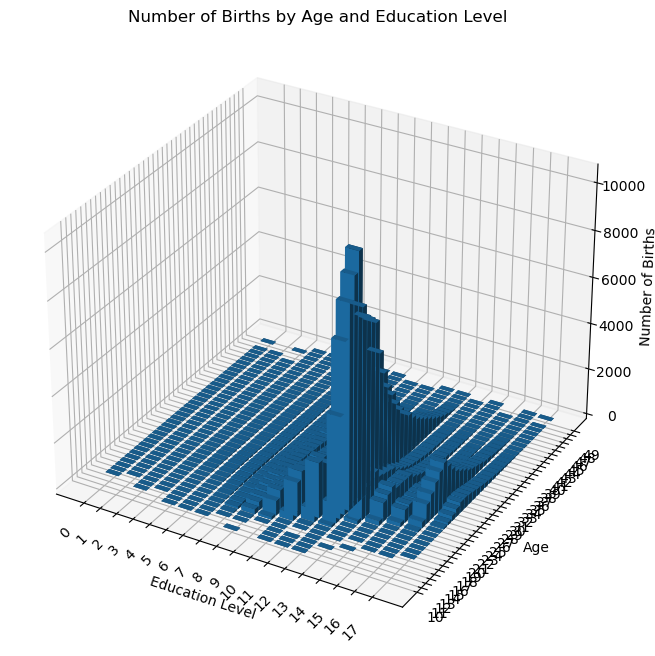

In [35]:
# Create a DataFrame from the birth_counts dictionary
df = pd.DataFrame(birth_counts)

# Reversed order for larger bars at the back
df = df.loc[list(reversed(df.index)), :]

# Sort education_levels in alphabetical order
education_levels = sorted(list(df.columns))

# Update the DataFrame columns to match the sorted education levels
df = df[education_levels]

# Get the x, y, and z coordinates for the bars
x_data = list(df.columns)

# Define a custom sorting function for the "Birth Order" axis
def custom_sort(value):
    try:
        # Sort numerically based on Birth Order
        return int(str(value).split()[0])
    except ValueError:
        # For the special case ">23," set a large value for sorting
        return float('inf')

# Sort "Birth Order" numerically and then alphabetically
sorted_birth_orders = sorted(list(df.index), key=custom_sort)

# Create a mapping of original birth order to sorted birth order positions
birth_order_mapping = {order: pos for pos, order in enumerate(sorted_birth_orders)}

# Get the sorted bar heights based on the new order
bar_height = []
for order in sorted_birth_orders:
    bar_height.extend(df.loc[order].values/10)

# Get the positions for sorted "Birth Order"
y_pos = np.array([birth_order_mapping[order] for order in sorted_birth_orders]).repeat(len(x_data))

# Create the 3D figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Sort bars based on Birth Order and height using argsort
sorted_indices = np.argsort(y_pos + bar_height)  # Adding small offset to ensure proper overlap
x_pos = np.array(np.tile(np.arange(len(x_data)), len(sorted_birth_orders)))[sorted_indices]
y_pos = np.array(np.repeat(list(birth_order_mapping.values()), len(x_data)))[sorted_indices]
bar_height = np.array(bar_height)[sorted_indices]

# Plot the 3D bars
ax.bar3d(x_pos, y_pos, np.zeros(len(x_data) * len(sorted_birth_orders)), 0.8, 0.8, bar_height, shade=True)

# Set the labels and title
ax.set_xlabel('Education Level')
ax.set_ylabel('Age')
ax.set_zlabel('Number of Births')
ax.set_title('Number of Births by Age and Education Level')

# Set the tick positions and labels
ax.set_xticks(np.arange(len(x_data)) + 0.4)
ax.set_xticklabels(x_data)
ax.set_yticks(np.arange(len(sorted_birth_orders)) + 0.4)
ax.set_yticklabels(sorted_birth_orders)

# Rotate the x-axis labels for better visibility
ax.set_xticklabels(x_data, rotation=45, ha='right')

# Set the z-axis scaling based on the maximum value from birth_counts
ax.set_zlim(0, max(bar_height))

# Display the chart
plt.show()

In [36]:
df.sort_index().apply(pd.to_numeric, errors='coerce').astype('Int64').fillna(0).astype('Int64')

0   1   2    3    4    5    6     7     8     9      10     11      12  \
10    0   0   0    0    0    0    0     0     2     0      2      2       6   
11    0   0   0    0    2    4    6     0     0     0      2      6       4   
12    0   0   2    0    6   16   58    40     6     0      2      6      16   
13    4   0   2    4   12   32  152   342   284    44      2      0       4   
14    2   6   6   12   38   54  246   910  2084  1136    192     38      38   
15    2  16   4   24   50   76  288  1128  3528  6316   3032    350     136   
16   20  16  26   48   72  118  416  1202  4206  9102  14704   5532     826   
17   40  26  46   74  122  192  460  1330  4672  9046  17764  23686    8502   
18   36  42  60  106  150  288  672  1622  5380  9042  16440  24018   43654   
19   64  48  68  156  238  320  806  1556  5748  9052  15974  19940   73334   
20   82  32  76  164  320  422  832  1652  6238  8330  14708  17664   87592   
21   60  38  66  130  316  412  970  1644  6122  8112  13820  16350   97258   
22   76  44  72  200  304  486  950  1664  5998  7808  13116  15222  105578   
23   80  50  80  192  360  478  984  1550  5660  6284  10308  10992   81136   
24  102  44  78  194  292  470  906  1368  5284  5632   9492   9708   75076   
25   70  40  64  192  292  424  908  1364  4928  5116   8784   9208   72500   
26  126  24  62  178  306  342  728  1234  4726  4728   8196   8404   69872   
27   96  36  80  166  294  348  792  1074  4252  3954   6848   7228   55464   
28  112  38  78  148  264  414  716   980  4124  3680   6154   6154   45382   
29   88  42  80  186  242  332  708   880  3798  3102   5268   5276   37610   
30  110  32  82  188  290  402  712   866  3468  2824   4688   4592   32680   
31   72  32  72  144  240  348  604   732  2922  2488   4004   3840   27128   
32  102  26  74  214  264  388  574   780  3216  2268   3490   3260   22842   
33   86  36  78  146  236  334  566   670  2810  1956   3108   2714   19334   
34  118  22  76  146  244  360  562   706  2734  1862   2832   2622   17104   
35   88  44  70  180  202  354  478   598  2486  1450   2410   2172   14358   
36  102  34  68  142  238  250  454   532  2326  1402   2036   1788   11976   
37   90  24  58  132  162  250  416   524  2164  1174   1828   1546   10160   
38   86  28  52  100  182  282  394   504  1886   968   1638   1304    8426   
39  102  22  52  100  196  238  322   454  1612   856   1396   1080    6872   
40   92  28  30   86  130  176  270   348  1320   660   1010    882    5108   
41   40  12  30   72  110  112  170   260  1054   464    684    630    3694   
42   48  14  30   60   76  112  154   194   682   346    534    480    2490   
43   32   6  28   34   44   76   80   114   522   244    352    286    1618   
44   16  10  14   26   26   32   74   106   334   128    192    160     954   
45   12   4   4   18   28   22   36    32   164    76     86     64     466   
46    8   4   0    8    6    6   26    18    96    24     22     16     206   
47    0   0   0    2   10    8    4    10    52    14     22     12      92   
48    4   0   2    2    2    2    8     6    16     2      2      6      34   
49    0   0   0    2    2    4    2     8     2     0      0      2       6   

       13     14    15     16    17  
10      0      0     0      0     0  
11      0      0     0      0     0  
12      4      0     0      0     0  
13      0      2     0      0     0  
14      4      0     2      2     0  
15      8      6     4      2     4  
16     36     22    14     12     8  
17    106     50    30     26     8  
18   1526    190    60     90    16  
19   9588   1900   204    196    34  
20  12566   8074  1686    528    52  
21  13480   9674  5536   2632   162  
22  15402  11380  6124   8402   524  
23  11814   9160  5000  11044  1094  
24  10918   9182  5202  14280  2174  
25  10280   8888  5232  16994  3306  
26   9450   8800  5194  19294  4414  
27   7516   6756  4120  16058  4414  
28   6068   5584  3388  12916  3988  
29   

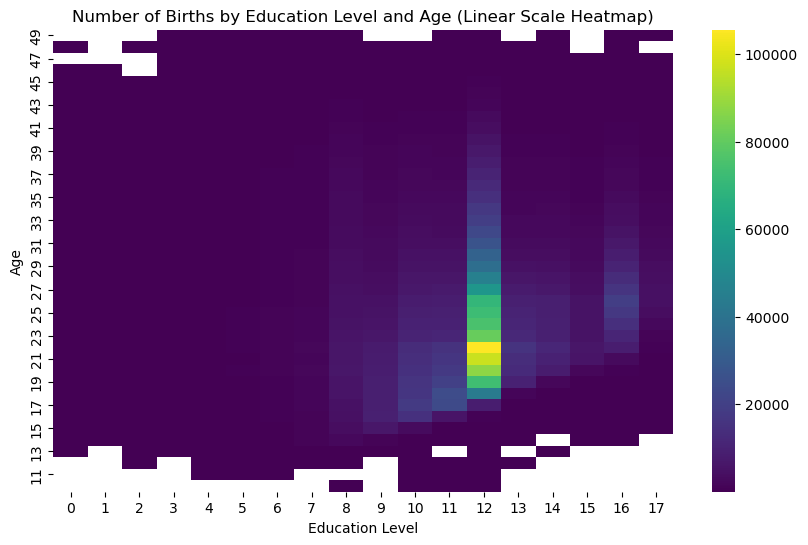

In [37]:
# Create a DataFrame from the birth_counts dictionary
df = pd.DataFrame(birth_counts)

# Reversed order for larger bars at the back
df = df.loc[list(reversed(df.index)), :]

# Define birth orders with ">23" at the end and sort them in reverse
birth_orders = list(df.index)
sorted_birth_orders = sorted(birth_orders, key=lambda x: int(str(x).split()[0]) if x != ">23" else float('inf'), reverse=True)

# Update the DataFrame index to match the sorted birth orders
df = df.reindex(sorted_birth_orders)

# Sort education_levels in alphabetical order
education_levels = sorted(list(df.columns))

# Update the DataFrame columns to match the sorted education levels
df = df[education_levels]

# Create the heatmap with no numbers displayed
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=False, cmap=choiceColorScaleLower)

# Set the labels and title
plt.xlabel('Education Level')
plt.ylabel('Age')
plt.title('Number of Births by Education Level and Age (Linear Scale Heatmap)')

# Display the chart
plt.show()

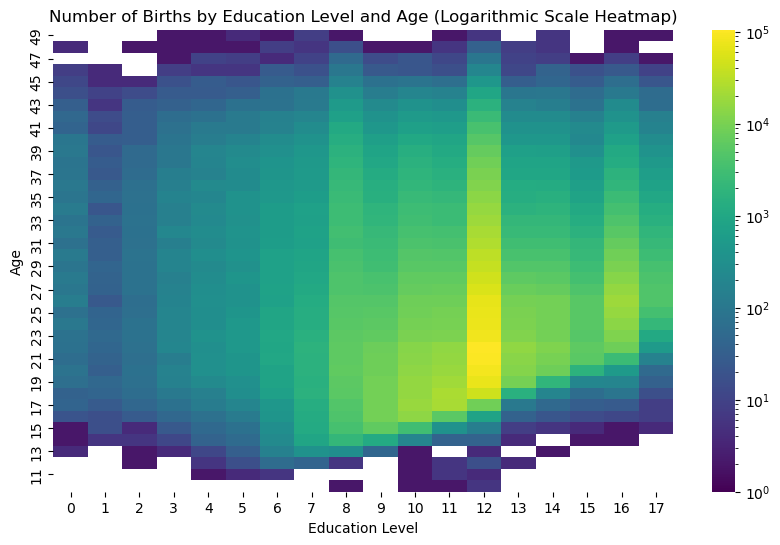

In [38]:
max_value = max(max(inner_dict.values()) for inner_dict in birth_counts.values())

plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=False, cmap=choiceColorScaleLower, norm=LogNorm(vmin=1, vmax=max_value))

# Set the labels and title
plt.xlabel('Education Level')
plt.ylabel('Age')
plt.title('Number of Births by Education Level and Age (Logarithmic Scale Heatmap)')

# Display the chart
plt.show()

In [39]:
import datetime

refreshFile()
mother_age_data = []
mother_edu_data = []
mother_race_data = []
father_age_data = []
father_edu_data = []
father_race_data = []
pop_size_data = []
sex_of_child_data = []
live_birth_order_data = []
birth_weight_data = []
gestation_wks_data = []

j = 0
for x in f:
    mother_age = int(getInfoByTapePos(x,41,42))
    mother_edu = int(getInfoByTapePos(x,98,99))
    mother_race = int(getInfoByTapePos(x,38))
    father_age = int(getInfoByTapePos(x,69,70))
    father_edu = int(getInfoByTapePos(x,103,104))
    father_race = int(getInfoByTapePos(x,37))
    pop_size = int(getInfoByTapePos(x,21))
    sex_of_child = int(getInfoByTapePos(x,35))
    live_birth_order = int(getInfoByTapePos(x,61,62))
    birth_weight = int(getInfoByTapePos(x,73,76))
    gestation_wks = int(getInfoByTapePos(x,93,94))
    mother_age_data.append(mother_age)
    mother_edu_data.append(mother_edu)
    mother_race_data.append(mother_race)
    father_age_data.append(father_age)
    father_edu_data.append(father_edu)
    father_race_data.append(father_race)
    pop_size_data.append(pop_size)
    sex_of_child_data.append(sex_of_child)
    live_birth_order_data.append(live_birth_order)
    birth_weight_data.append(birth_weight)
    gestation_wks_data.append(gestation_wks)
#     j += 1
#     if j % 200000 == 0:
#         print(str(j) + "\t" + str((datetime.datetime.now()).strftime('%H:%M:%S')))
data = {
    'mother_age':mother_age_data, 
    'mother_edu':mother_edu_data, 
    'mother_race':mother_race_data, 
    'father_age':father_age_data, 
    'father_edu':father_edu_data, 
    'father_race':father_race_data, 
    'pop_size':pop_size_data, 
    'sex_of_child':sex_of_child_data, 
    'live_birth_order':live_birth_order_data, 
    'birth_weight':birth_weight_data, 
    'gestation_wks':gestation_wks_data
}
df = pd.DataFrame(data)

In [40]:
df.describe()

mother_age    mother_edu   mother_race    father_age    father_edu  \
count  1.800103e+06  1.800103e+06  1.800103e+06  1.800103e+06  1.800103e+06   
mean   2.473676e+01  4.098919e+01  1.221959e+00  3.397651e+01  4.613638e+01   
std    5.640532e+00  3.720212e+01  7.059488e-01  2.074237e+01  3.846458e+01   
min    1.000000e+01  0.000000e+00  0.000000e+00  1.700000e+01  0.000000e+00   
25%    2.100000e+01  1.200000e+01  1.000000e+00  2.300000e+01  1.200000e+01   
50%    2.400000e+01  1.300000e+01  1.000000e+00  2.700000e+01  1.600000e+01   
75%    2.800000e+01  8.800000e+01  1.000000e+00  3.400000e+01  8.800000e+01   
max    4.900000e+01  9.900000e+01  9.000000e+00  9.900000e+01  9.900000e+01   

        father_race      pop_size  sex_of_child  live_birth_order  \
count  1.800103e+06  1.800103e+06  1.800103e+06      1.800103e+06   
mean   1.737888e+00  7.251021e+00  1.487093e+00      3.160728e+00   
std    2.100642e+00  3.358491e+00  4.998335e-01      8.506973e+00   
min    0.000000e+00  0.000000e+00  1.000000e+00      1.000000e+00   
25%    1.000000e+00  9.000000e+00  1.000000e+00      1.000000e+00   
50%    1.000000e+00  9.000000e+00  1.000000e+00      2.000000e+00   
75%    1.000000e+00  9.000000e+00  2.000000e+00      3.000000e+00   
max    9.000000e+00  9.000000e+00  2.000000e+00      9.900000e+01   

       birth_weight  gestation_wks  
count  1.800103e+06   1.800103e+06  
mean   3.305041e+03   3.754785e+01  
std    7.743429e+02   3.042782e+01  
min    2.270000e+02   0.000000e+00  
25%    2.948000e+03   0.000000e+00  
50%    3.289000e+03   3.900000e+01  
75%    3.629000e+03   4.100000e+01  
max    9.999000e+03   9.900000e+01

C:\Users\josia\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning:

invalid value encountered in log



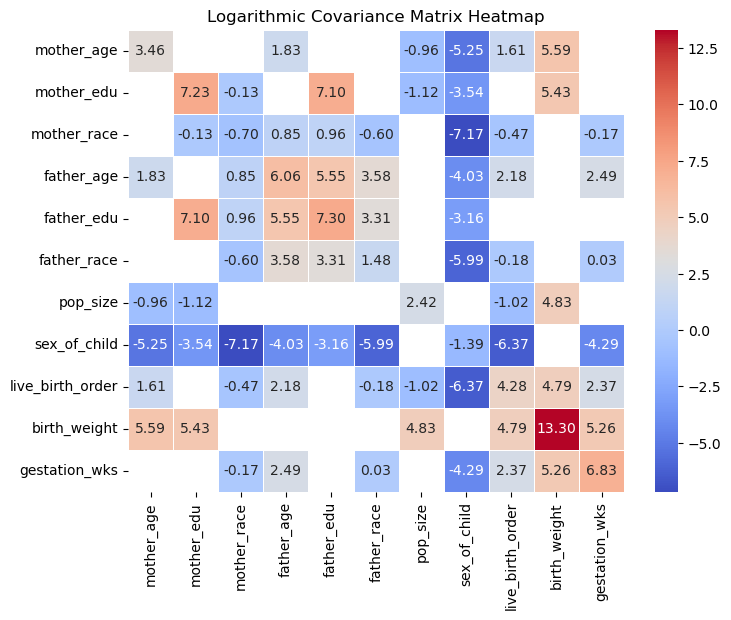

In [41]:
log_covar = np.log(df.apply(pd.to_numeric, errors='coerce').fillna(0.001).cov())
plt.figure(figsize=(8, 6))
sns.heatmap(log_covar, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Logarithmic Covariance Matrix Heatmap')
plt.show()

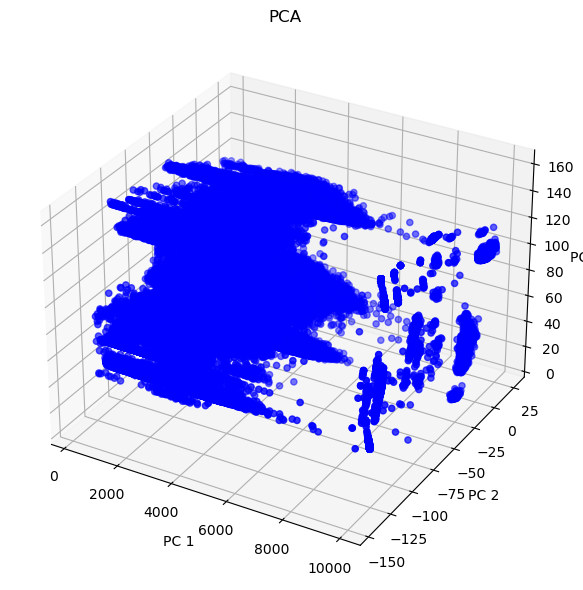

In [42]:
M = df.values
N = M - M.mean(0)
O = N.T @ N
w, v = np.linalg.eig(O)

idx = w.argsort()[::-1]
w = w[idx]
v = v[:,idx]

x = M @ v[:,0]
y = M @ v[:,1]
z = M @ v[:,2]

# Create a 3D figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='b', marker='o')


# Set labels for each axis
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')


plt.title('PCA')
plt.tight_layout()
plt.show()